In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Load Dataset
df_smsa = pd.read_csv('IDSMSA.csv')
df_ihsg = pd.read_csv('IHSG_2024_2025.csv')
df_smsa.head()

,Tweet Date,Sentence,Quote Count,Reply Count,Retweet Count,Favorite Count,Sentiment,English Translation
0,Thu Feb 29 11:21:27 +0000 2024,"Gk muluk muluk, 100,000 lot saham BBCA aja",0,0,0,0,Positive,"Not too ambitious, just 100,000 lots of BBCA s..."
1,Thu Feb 29 10:11:05 +0000 2024,BCA Expoversary 2024 menawarkan promo suku bun...,0,0,0,0,Neutral,BCA Expoversary 2024 offers special interest r...
2,Thu Feb 29 10:06:04 +0000 2024,[USERNAME] saham bca nya menyusul ya 🙂,0,0,0,0,Positive,[USERNAME] BCA shares will follow 🙂
3,Thu Feb 29 07:42:09 +0000 2024,PT Bank BCA Syariah (BCA Syariah) turut memeri...,0,0,0,0,Neutral,PT Bank BCA Syariah (BCA Syariah) also enliven...
4,Thu Feb 29 06:06:17 +0000 2024,[USERNAME] Begitu byk saham kamu memilih saham...,0,0,0,1,Positive,[USERNAME] So many stocks you choose those sto...


In [ ]:
# Tampilkan grafik dalam notebook
%matplotlib inline

In [ ]:
# 2. Ganti nama kolom 'Tweet Date' menjadi 'Date' agar bisa digabung
df_smsa.rename(columns={'Tweet Date': 'Date'}, inplace=True)

In [ ]:
# 3. Ubah format 'Date' dari df_smsa menjadi datetime dan hanya ambil tanggal (tanpa jam & timezone)
df_smsa['Date'] = pd.to_datetime(df_smsa['Date'], utc=True)  # Parsing dari format Twitter
df_smsa['Date'] = df_smsa['Date'].dt.tz_localize(None).dt.date  # Hapus timezone

/tmp/ipython-input-5-3433289705.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_smsa['Date'] = pd.to_datetime(df_smsa['Date'], utc=True)  # Parsing dari format Twitter


In [ ]:
# 4. Ubah kolom 'Date' dari df_ihsg menjadi datetime (ambil hanya tanggal)
df_ihsg['Date'] = pd.to_datetime(df_ihsg['Date']).dt.date

In [ ]:
# 5. Merge kedua dataset berdasarkan kolom 'Date'
df_merge = pd.merge(df_smsa, df_ihsg, on='Date', how='inner')
print(f"Jumlah baris setelah merge: {len(df_merge)}")
display(df_merge.head())

Jumlah baris setelah merge: 1056


,Date,Sentence,Quote Count,Reply Count,Retweet Count,Favorite Count,Sentiment,English Translation,Close,High,Low,Open,Volume
0,2024-02-29,"Gk muluk muluk, 100,000 lot saham BBCA aja",0,0,0,0,Positive,"Not too ambitious, just 100,000 lots of BBCA s...",7316.11084,7337.922852,7289.341797,7326.803223,230050900
1,2024-02-29,BCA Expoversary 2024 menawarkan promo suku bun...,0,0,0,0,Neutral,BCA Expoversary 2024 offers special interest r...,7316.11084,7337.922852,7289.341797,7326.803223,230050900
2,2024-02-29,[USERNAME] saham bca nya menyusul ya 🙂,0,0,0,0,Positive,[USERNAME] BCA shares will follow 🙂,7316.11084,7337.922852,7289.341797,7326.803223,230050900
3,2024-02-29,PT Bank BCA Syariah (BCA Syariah) turut memeri...,0,0,0,0,Neutral,PT Bank BCA Syariah (BCA Syariah) also enliven...,7316.11084,7337.922852,7289.341797,7326.803223,230050900
4,2024-02-29,[USERNAME] Begitu byk saham kamu memilih saham...,0,0,0,1,Positive,[USERNAME] So many stocks you choose those sto...,7316.11084,7337.922852,7289.341797,7326.803223,230050900


In [ ]:
# 6. Statistik deskriptif
print("\nStatistik Deskriptif:")
display(df_merge.describe())


Statistik Deskriptif:


,Quote Count,Reply Count,Retweet Count,Favorite Count,Close,High,Low,Open,Volume
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1.056000e+03
mean,0.399621,1.594697,1.199811,8.172348,7265.953510,7299.748949,7232.933311,7271.191238,1.577465e+08
std,4.263074,10.060223,13.479310,129.100676,60.174584,57.006614,62.259331,58.857500,2.802426e+07
min,0.000000,0.000000,0.000000,0.000000,7137.087891,7166.689941,7099.083984,7147.235840,1.143649e+08
25%,0.000000,0.000000,0.000000,0.000000,7209.741211,7256.229004,7185.378906,7232.516113,1.373259e+08
50%,0.000000,0.000000,0.000000,0.000000,7283.575195,7301.587891,7250.310059,7268.334961,1.521965e+08
75%,0.000000,1.000000,0.000000,1.000000,7316.110840,7340.189941,7289.257813,7323.312012,1.786613e+08
max,97.000000,209.000000,340.000000,4066.000000,7359.763184,7403.578125,7350.619141,7376.288086,2.300509e+08


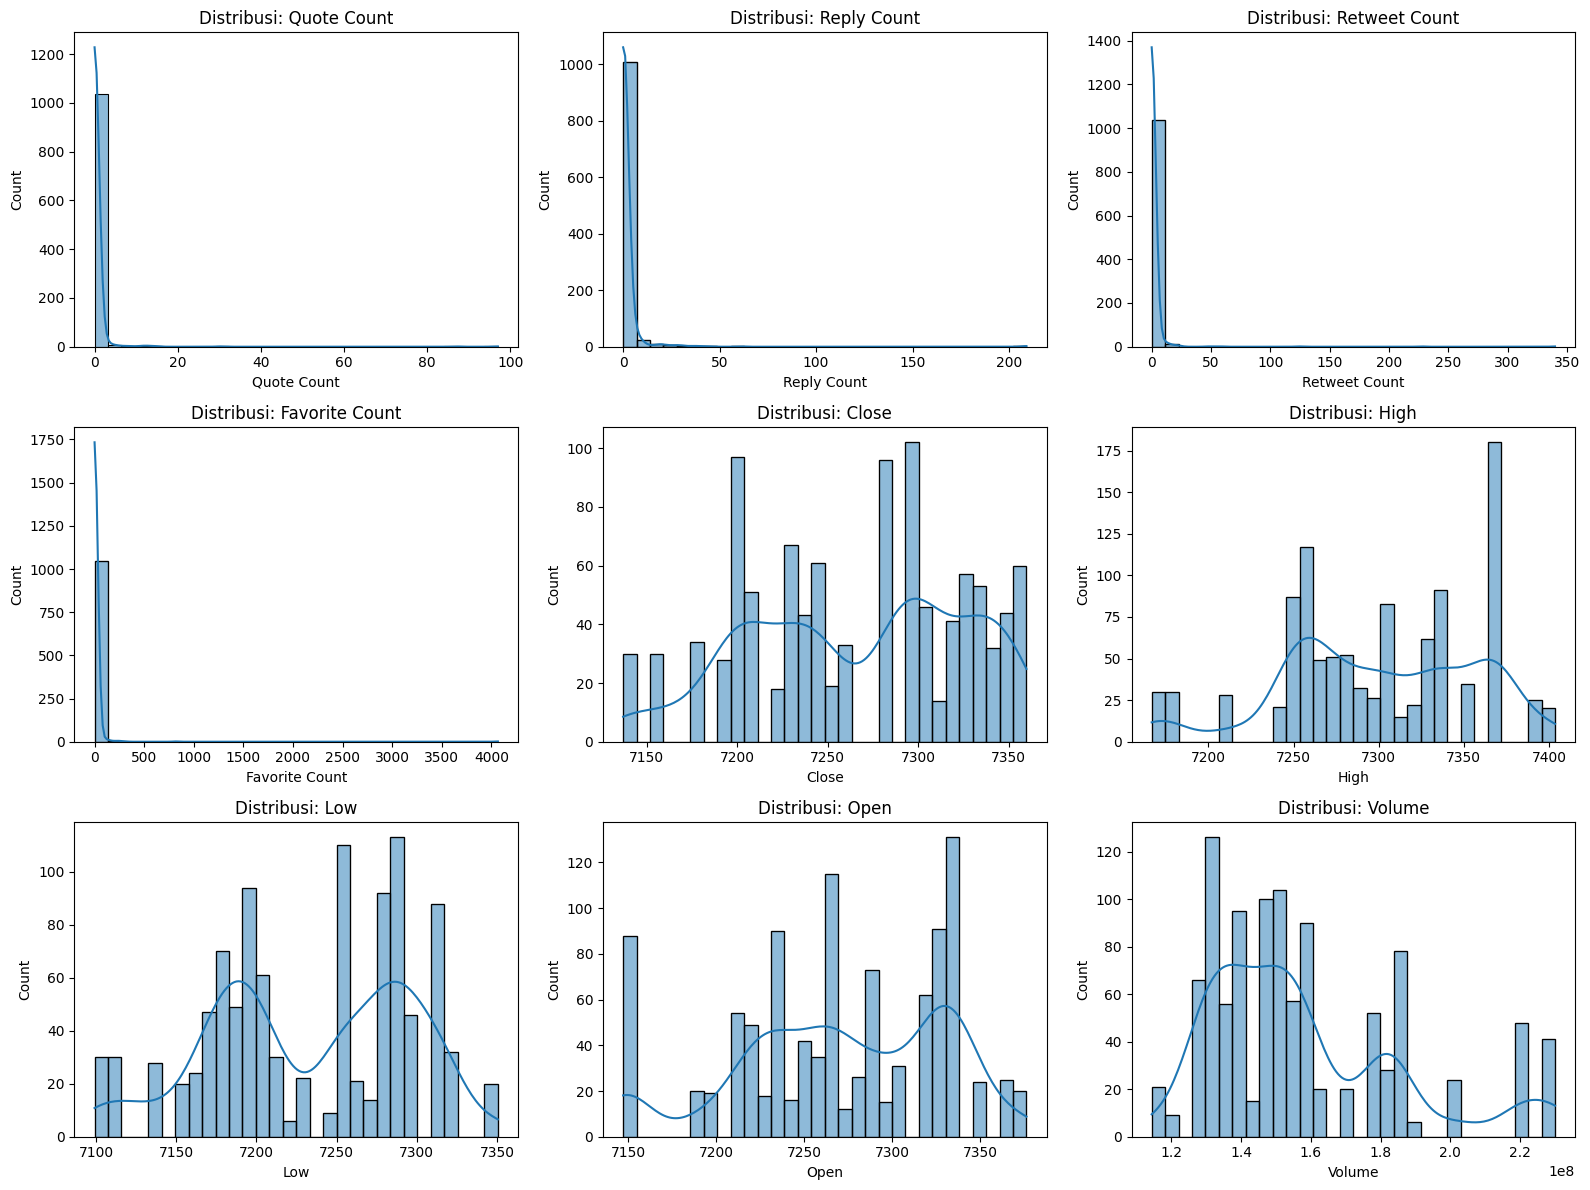

In [ ]:
# Visualisasi histogram per kolom numerik
numeric_cols = df_merge.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_merge[col], kde=True, bins=30)
    plt.title(f'Distribusi: {col}')
    plt.tight_layout()

plt.show()


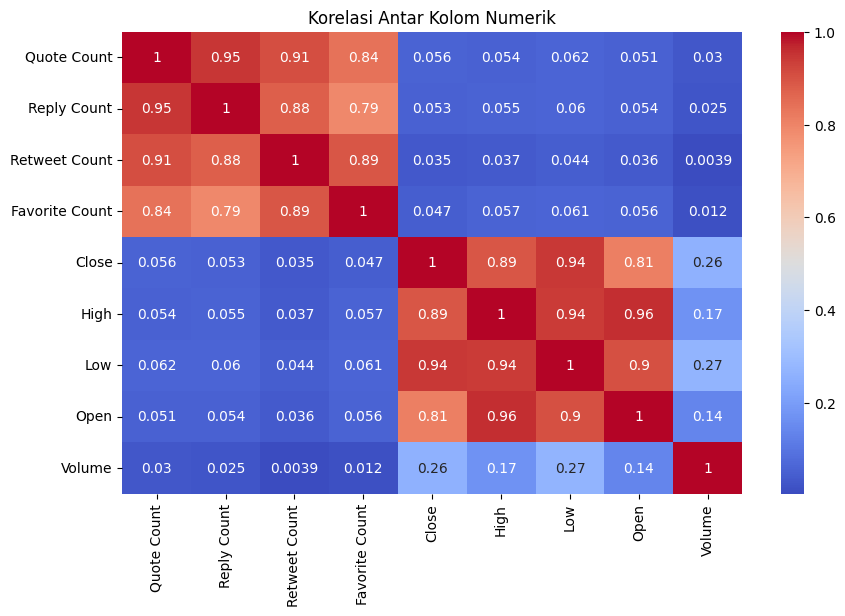

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_merge.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Kolom Numerik")
plt.show()


In [12]:
# --- Deteksi Outlier dengan IQR ---
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [13]:
# Tampilkan jumlah outlier di setiap kolom numerik
numeric_cols = df_merge.select_dtypes(include='number').columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(df_merge, col)
    print(f"Kolom '{col}': {len(outliers)} outlier")

Kolom 'Quote Count': 74 outlier
Kolom 'Reply Count': 91 outlier
Kolom 'Retweet Count': 124 outlier
Kolom 'Favorite Count': 114 outlier
Kolom 'Close': 0 outlier
Kolom 'High': 0 outlier
Kolom 'Low': 0 outlier
Kolom 'Open': 0 outlier
Kolom 'Volume': 0 outlier


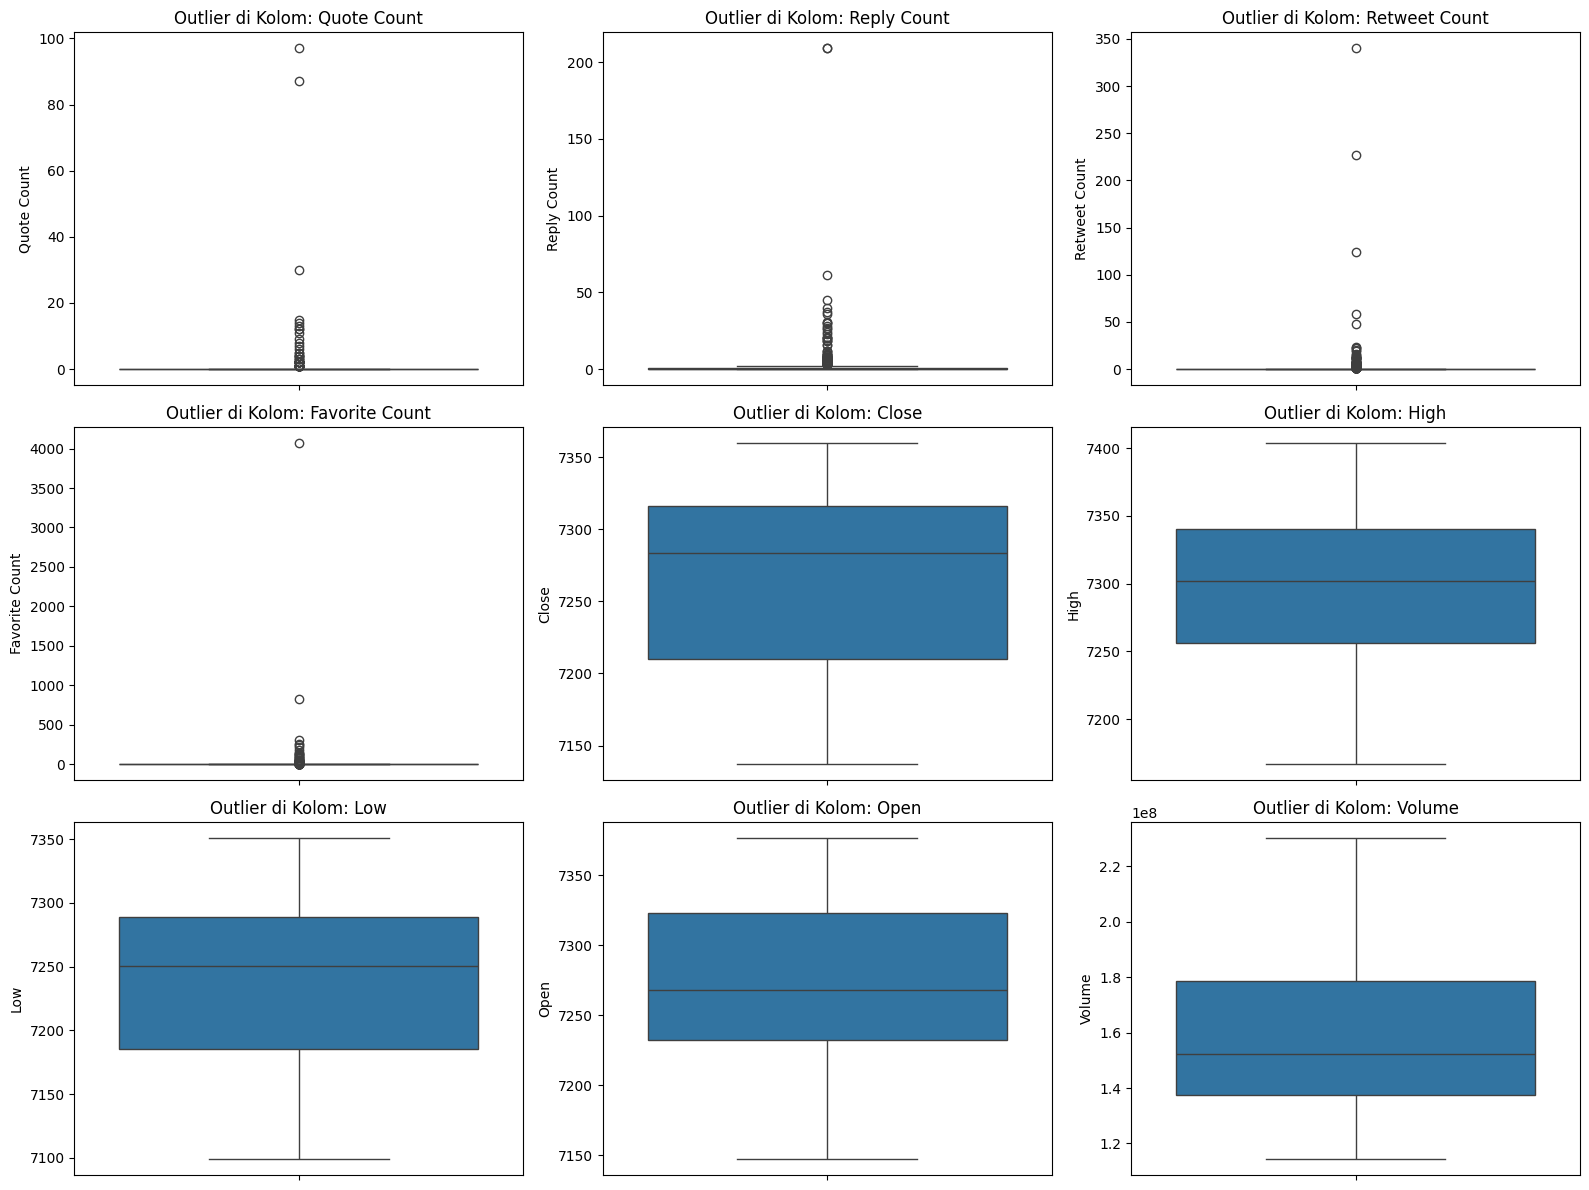

In [14]:
# --- Visualisasi Outlier dengan Boxplot ---
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_merge[col])
    plt.title(f'Outlier di Kolom: {col}')
    plt.tight_layout()

plt.show()


Sentiment
Positive    577
Negative    263
Neutral     216
Name: count, dtype: int64


/tmp/ipython-input-15-255167140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merge, x='Sentiment', palette='Set2')


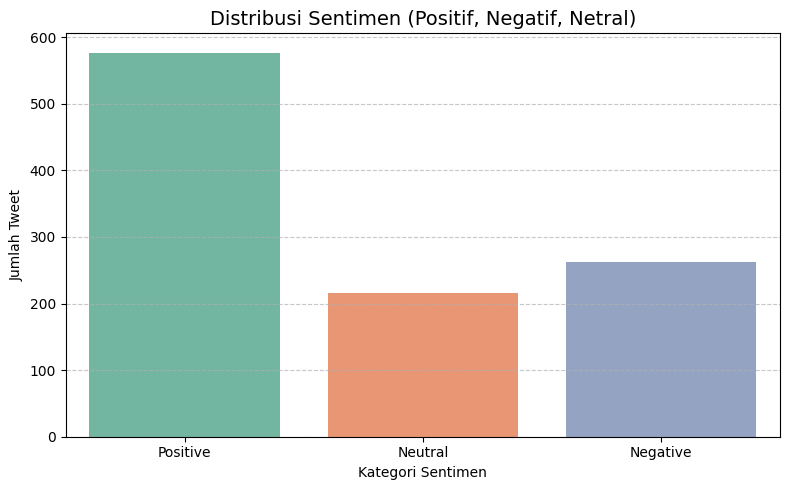

In [15]:
# Pastikan kolom 'Sentiment' sudah ada dan bersih
print(df_merge['Sentiment'].value_counts())

# Plot diagram batang jumlah sentimen
plt.figure(figsize=(8,5))
sns.countplot(data=df_merge, x='Sentiment', palette='Set2')

plt.title('Distribusi Sentimen (Positif, Negatif, Netral)', fontsize=14)
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Tweet')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()